In [ ]:
from selenium import webdriver
from time import sleep
import random

stop_value = 2000000 
stop = False
final_data = {}
work_stack = ["""Ahuman%231111"""]

current_player_id = work_stack[0]
driver = webdriver.Chrome()

while len(work_stack) > 0:
    try:
        url = f"https://api.tracker.gg/api/v1/valorant/matches/riot/{current_player_id}/aggregated?localOffset=-480&playlist=competitive"
        driver.get(url)
        sleep(random.randint(10,20))
        data = driver.page_source
        data = dict(eval(data
                        .replace("true", "True")
                        .replace("false", "False")
                        .replace("null", "None")
                        .replace("""<html><head><meta name="color-scheme" content="light dark"><meta charset="utf-8"></head><body><pre>""","")
                        .replace("""</pre><div class="json-formatter-container"></div></body></html>""","")))

        teammates = data['data']['teammates']
        teammates_data = []

        work_stack.pop(0)
        
        

        for teammate in teammates:
            teammates_data.append({
                "name": teammate["teammate"],
                "matches" : teammate["data"]["matches"],
                "winPct" : teammate["data"]["winPct"]
            })
            if teammate["teammate"] not in work_stack and teammate["teammate"] not in final_data:
                work_stack.append(teammate["teammate"].replace("#", "%23").replace(" ", "%20"))

        final_data[current_player_id] = teammates_data
        if len(final_data) > stop_value:
            stop = True
        print(len(final_data))

        current_player_id = work_stack[0] if len(work_stack) > 0 else None
    




    


    except Exception as e:
        print(f"An error occurred: {e}")
        work_stack.pop(0)
        current_player_id = work_stack[0] if len(work_stack) > 0 else None
        continue

#save to csv
import csv
with open('valorant_teammates_data_2.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Player ID", "Teammate Name", "Matches", "Win Percentage"])
    for player_id, teammates in final_data.items():
        for teammate in teammates:
            writer.writerow([player_id, teammate["name"], teammate["matches"], teammate["winPct"]])


driver.quit()

In [33]:
import csv
with open('valorant_teammates_data_2.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(["Player ID", "Teammate Name", "Matches", "Win Percentage"])
    for player_id, teammates in final_data.items():
        for teammate in teammates:
            writer.writerow([player_id, teammate["name"], teammate["matches"], teammate["winPct"]])


c:\Users\him15\Documents\GitHub\GE2324_GP9\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30690 (\N{CJK UNIFIED IDEOGRAPH-77E2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\him15\Documents\GitHub\GE2324_GP9\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21561 (\N{CJK UNIFIED IDEOGRAPH-5439}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\him15\Documents\GitHub\GE2324_GP9\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19976 (\N{CJK UNIFIED IDEOGRAPH-4E08}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\him15\Documents\GitHub\GE2324_GP9\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\him15\Documents\GitHub\GE2324_GP9\.venv\Lib\site-packages\IPython\c

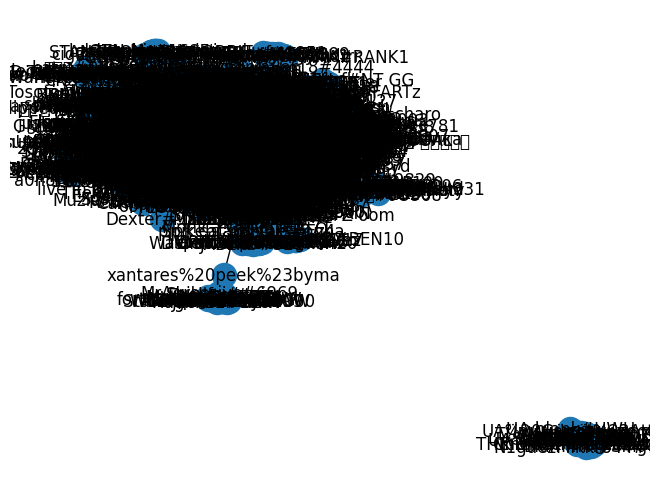

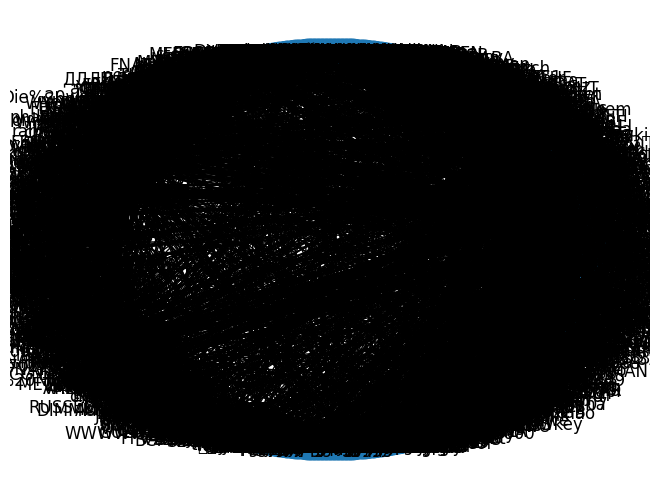

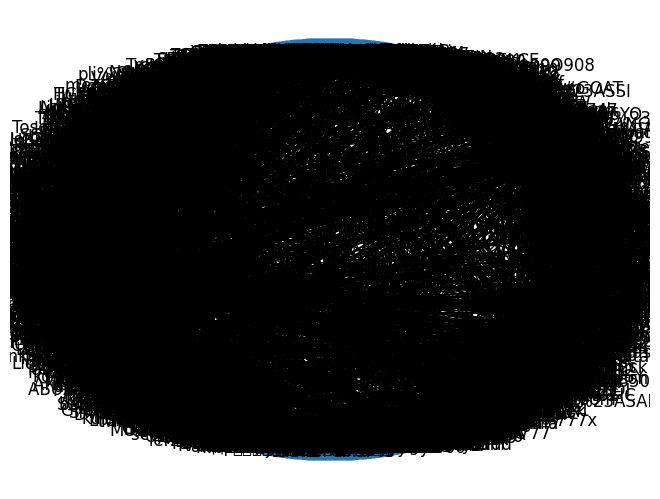

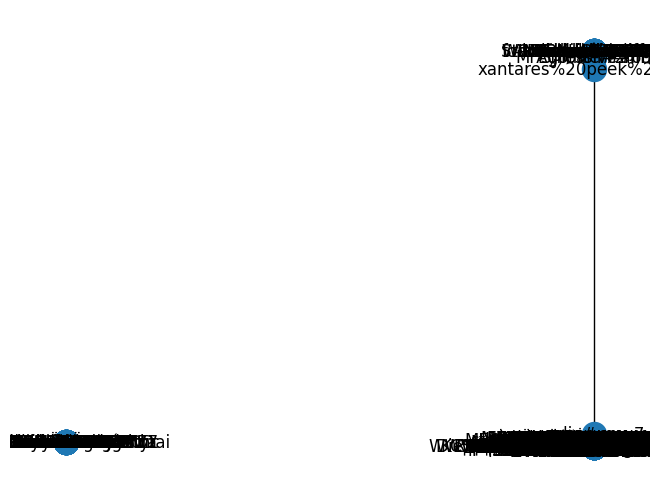

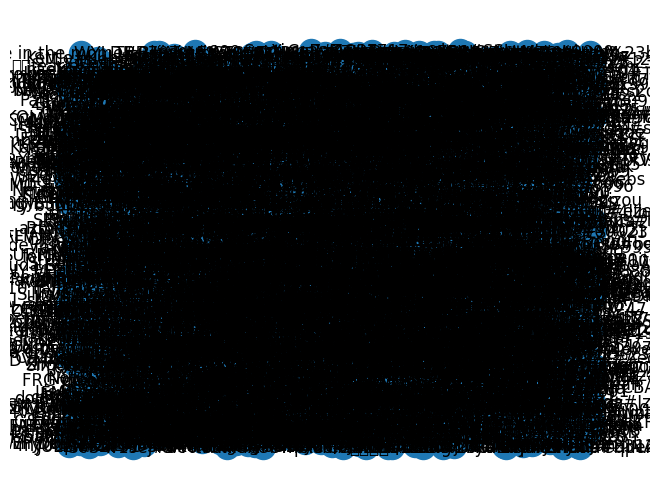

NetworkXException: G is not planar.

In [ ]:
import networkx as nx


G = nx.Graph()
#load csv data add with weights
with open('valorant_teammates_data.csv', mode='r', encoding='utf-8') as file:
    reader = csv.DictReader(file)
    for row in reader:
        player_id = row["Player ID"]
        teammate_name = row["Teammate Name"]
        matches = int(row["Matches"])
        if G.has_edge(player_id, teammate_name):
            G[player_id][teammate_name]['weight'] += matches
        else:
            G.add_edge(player_id, teammate_name, weight=matches)


#save graph to gml file
nx.write_gml(G, "valorant_teammates_graph.gml")

import matplotlib.pyplot as plt

nx.draw_spring(G, with_labels=True)
plt.show()

nx.draw_circular(G, with_labels=True)
plt.show()

nx.draw_shell(G, with_labels=True)
plt.show()

nx.draw_spectral(G, with_labels=True)
plt.show()

nx.draw_random(G, with_labels=True)
plt.show()

